In [1]:
import numpy as np
from scipy import optimize
from scipy import interpolate

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-whitegrid')
colors = [x['color'] for x in plt.style.library['seaborn']['axes.prop_cycle']]
from matplotlib import cm

# Linear regression

In [2]:
def DGP(N):
    """ data generating process
    
    Args:
        
        N (int): number of observations
        
    Returns:
    
        x1 (ndarray): independent variable x1
        x2 (ndarray): independent variable x2
        y (ndarray): dependent varialbe y
        
    """
    
    # a. independent variables
    x1 = np.random.normal(0,1,size=N)
    x2 = np.random.normal(0,1,size=N)
    
    # b. errors
    eps = np.random.normal(0,1,size=N)
    
    extreme = np.random.uniform(0,1,size=N)
    eps[extreme < 0.05] += np.random.normal(-5,1,size=N)[extreme < 0.05]
    eps[extreme > 0.95] += np.random.normal(5,1,size=N)[extreme > 0.95]
    
    # d. depenent variable
    y = 0.1 + 0.3*x1 + 0.5*x2 + eps
    
    return x1, x2, y

In [3]:
np.random.seed(2020)
x1,x2,y = DGP(10000)

## Question 1

In [4]:
def OLS_estimate(x1,x2,y):
    """ compute OLS estimates using matrix algebra
    
    Args:
        
        x1 (ndarray): independent variable x1
        x2 (ndarray): independent variable x2
        y (ndarray): dependent varialbe y
        
    Returns:
    
        betas (ndrarray): estimates
    
        
    """
    
    X = np.vstack((np.ones(x1.size),x1,x2)).T
    betas = (np.linalg.inv(X.T@X)@X.T)@y
    return betas
    
betas = OLS_estimate(x1,x2,y)
for i,beta in enumerate(betas):
    print(f'beta{i} = {beta:.4f}')

beta0 = 0.0957
beta1 = 0.2929
beta2 = 0.5033


## Question 2

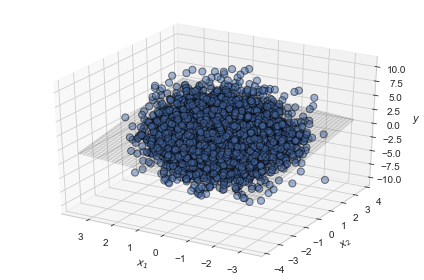

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')

# a. predicted
x1v = np.linspace(x1.min(),x1.max(),100)
x2v = np.linspace(x2.min(),x2.max(),100)
x1g, x2g = np.meshgrid(x1v,x2v,indexing='ij')
yhat = betas[0] + betas[1]*x1g + betas[2]*x2g
ax.plot_wireframe(x1g,x2g,yhat,color='black',alpha=0.1);

# b. scatter
ax.scatter(x1,x2,y,s=50,edgecolor='black',facecolor=colors[0],alpha=0.5);

# c. details
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.invert_xaxis()
fig.tight_layout()

## Question 3

In [6]:
def OLS_objective(betas,x1,x2,y):
    """ OLS objective
    
    Args:
        
        betas (ndarray): current guess on parameters 
        x1 (ndarray): independent variable x1
        x2 (ndarray): independent variable x2
        y (ndarray): dependent varialbe y
        
    Returns:
    
        ressum (ndrarray): sum of squared residuals
        
    """
    
    yhat = betas[0] + betas[1]*x1 + betas[2]*x2
    ressum = np.sum((yhat-y)**2)
    return ressum

def OLS_estimate_alt(x1,x2,y):
    """ compute OLS estimates using numerical optimizer
    
    Args:
        
        x1 (ndarray): independent variable x1
        x2 (ndarray): independent variable x2
        y (ndarray): dependent varialbe y
        
    Returns:
    
        betas (ndarray): parameter estimates 
        
    """    
    
    betas0 = np.array([0.1,0.3,0.5])
    sol = optimize.minimize(OLS_objective,betas0,args=(x1,x2,y),method='Nelder-Mead')
    betas = sol.x
    return betas


In [7]:
betas = OLS_estimate_alt(x1,x2,y)
for i,beta in enumerate(betas):
    print(f'beta{i} = {beta:.4f}')

beta0 = 0.0957
beta1 = 0.2929
beta2 = 0.5033


## Question 4

In [8]:
def LAD_objective(betas,x1,x2,y):
    """ LAD objective
    
    Args:
        
        betas (ndarray): current guess on parameters 
        x1 (ndarray): independent variable x1
        x2 (ndarray): independent variable x2
        y (ndarray): dependent varialbe y
        
    Returns:
    
        ressum (ndrarray): sum of absolute residuals
        
    """
    
    yhat = betas[0] + betas[1]*x1 + betas[2]*x2
    ressum = np.sum(np.abs(yhat-y))
    return ressum

def LAD_estimate(x1,x2,y):
    """ compute LAD estimates using numerical optimizer
    
    Args:
        
        x1 (ndarray): independent variable x1
        x2 (ndarray): independent variable x2
        y (ndarray): dependent varialbe y
        
    Returns:
    
        betas (ndarray): parameter estimates
        
    """
    
    betas0 = np.array([0.1,0.3,0.5])
    sol = optimize.minimize(LAD_objective,betas0,args=(x1,x2,y),method='Nelder-Mead')
    betas = sol.x
    return betas

In [9]:
betas = LAD_estimate(x1,x2,y)
for i,beta in enumerate(betas):
    print(f'beta{i} = {beta:.4f}')

beta0 = 0.0921
beta1 = 0.3074
beta2 = 0.5116


## Question 5

In [10]:
# a. setup
K = 5000
N = 50

# b. allocate
betas_OLS = np.empty((K,3))
betas_LAD = np.empty((K,3))

# c. estimate
for k in range(K):
    x1,x2,y = DGP(N)
    betas_OLS[k,:] = OLS_estimate(x1,x2,y)
    betas_LAD[k,:] = LAD_estimate(x1,x2,y)

**Mean and std.:**

In [11]:
for i in range(3):
    print(f'beta{i}')
    print(f' OLS: mean = {np.mean(betas_OLS[:,i]):.4f}, std. = {np.std(betas_OLS[:,i]):.4f}')
    print(f' LAD: mean = {np.mean(betas_LAD[:,i]):.4f}, std. = {np.std(betas_LAD[:,i]):.4f}')

beta0
 OLS: mean = 0.1026, std. = 0.2749
 LAD: mean = 0.1025, std. = 0.2032
beta1
 OLS: mean = 0.3019, std. = 0.2844
 LAD: mean = 0.3027, std. = 0.2134
beta2
 OLS: mean = 0.5003, std. = 0.2860
 LAD: mean = 0.5008, std. = 0.2116


**Histograms:**

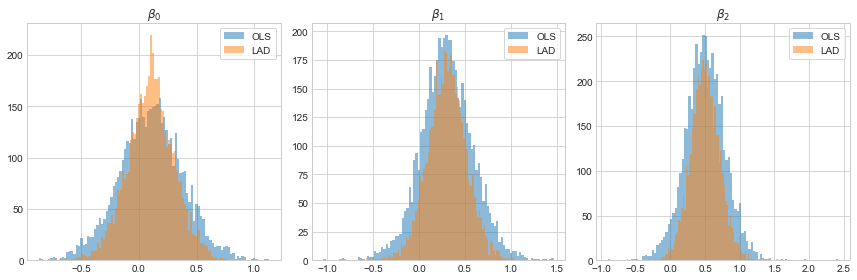

In [12]:
fig = plt.figure(figsize=(12,4))

for i in range(3):
    
    ax = fig.add_subplot(1,3,i+1)
    ax.hist(betas_OLS[:,i],bins=100,alpha=0.5,label='OLS');
    ax.hist(betas_LAD[:,i],bins=100,alpha=0.5,label='LAD');
    ax.set_title(f'$\\beta_{{{i}}}$')
    ax.legend(frameon=True)
    
fig.tight_layout()

# Durable consumption

In [13]:
# a. parameters
rho = 2
alpha = 0.8
chi = 0.9
beta = 0.96
r = 0.04
Delta = 0.25

# b. grids
d_vec = np.linspace(1e-8,5,100)
m1_vec = np.linspace(1e-8,10,100)
m2_vec = np.linspace(0.5,10,100)

## Question 1

In [14]:
def utility(c,d,x,rho,alpha,chi):
    """ utility
    
    Args:
    
        c (float): non-durable consumption
        d (float): pre-commited durable consumption
        x (float): extra durable consumption
        rho (float): CRRA parameter
        alpha (float): utility weight on non-durable consumption
        chi (float): scala factor for extra durable consumption
        
    Returns:
    
        (float): utility of consumption
    
    """
    
    return (c**alpha*(d+chi*x)**(1-alpha))**(1-rho)/(1-rho)

def v2(c,m2,d,rho,alpha,chi):
    """ value of choice in period 2
    
    Args:
    
        c (float): non-durable consumption
        m2 (float): cash-on-hand in beginning of period 2
        d (float): pre-commited durable consumption
        x (float): extra durable consumption
        rho (float): CRRA parameter
        alpha (float): utility weight on non-durable consumption
        chi (float): scala factor for extra durable consumption
        
    Returns:
    
        (float): value-of-choice
    
    """
    
    x = m2-c
    return utility(c,d,x,rho,alpha,chi)

In [15]:
def solve_period_2(m2_vec,d_vec,rho,alpha,chi):
    """ solve consumer problem in period 2 
    
    Args:
    
        m2 (ndarray): vector of cash-on-hand in beginning of period 2
        d (ndarray): vector of pre-commited durable consumption
        d (float): pre-commited durable consumption
        x (float): extra durable consumption
        rho (float): CRRA parameter
        alpha (float): utility weight on non-durable consumption
        chi (float): scala factor for extra durable consumption
        
    Returns:
    
        v2_mat (ndarray): value function in period 2
        c_ast_mat (ndarray): consumption function
        x_ast_mat (ndarray): implied extra durable consumption function
    
    """
    
    # a. allocate
    v2_mat = np.empty((m2_vec.size,d_vec.size)) 
    c_ast_mat = np.empty((m2_vec.size,d_vec.size))
    x_ast_mat = np.empty((m2_vec.size,d_vec.size))
    
    # b. loop over states
    for i,m2 in enumerate(m2_vec):
        for j,d in enumerate(d_vec):
            
            # i. objective
            obj = lambda c: -v2(c,m2,d,rho,alpha,chi)

            # ii. initial value (consume half)
            x0 = m2/2

            # iii. optimizer
            result = optimize.minimize_scalar(obj,x0,method='bounded',bounds=[1e-8,m2])

            # iv. save
            v2_mat[i,j] = -result.fun
            c_ast_mat[i,j] = result.x
            x_ast_mat[i,j] = m2-c_ast_mat[i,j]

    return v2_mat,c_ast_mat,x_ast_mat

In [16]:
v2_mat,c_ast_mat,x_ast_mat = solve_period_2(m2_vec,d_vec,rho,alpha,chi)

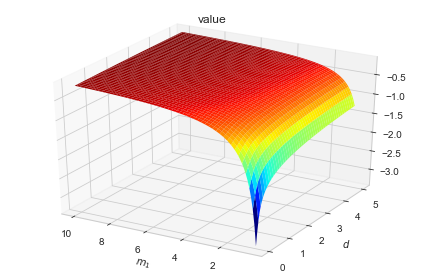

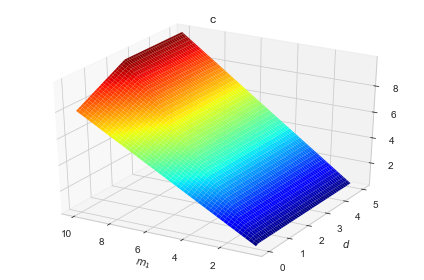

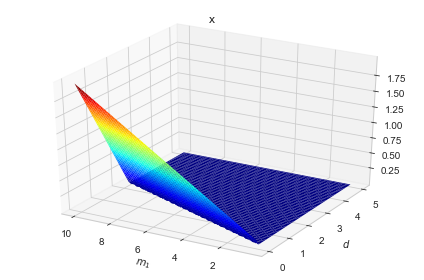

In [17]:
for ystr,y in [('value',v2_mat),('c',c_ast_mat),('x',x_ast_mat)]:

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1,projection='3d')

    # a. value function
    m2g,dg = np.meshgrid(m2_vec,d_vec,indexing='ij')
    ax.plot_surface(m2g,dg,y,cmap=cm.jet)

    # b. details
    ax.set_title(ystr)
    ax.set_xlabel('$m_1$')
    ax.set_ylabel('$d$')
    ax.set_zlabel('')
    ax.invert_xaxis()
    fig.tight_layout()

## Questions 2

In [18]:
v2_interp = interpolate.RegularGridInterpolator([m2_vec,d_vec], v2_mat,
                                                bounds_error=False,fill_value=None)   

In [19]:
def w(a,d,r,Delta,v2_interp):
    """ post-decision value function in period 1
    
    Args:
    
        a (float): end-of-period asset
        d (float): pre-commited durable consumption
        r (float): return on savings
        Delta (float): income risk scale factor
        v2_interp (RegularGridInterpolator): interpolator for value function in period 2
        
    Returns:
    
        (ndarray): discounted post-decision value
    
    """
    
    # a. initialize
    w = 0
    y = np.array([1-Delta,1,1+Delta])
    
    # b. loop over shocks
    for i in range(3):
        m2_now = (1+r)*a + y[i]
        v2_now = v2_interp([m2_now,d])[0]
        w += 1/3*v2_now
        
    return beta*w

In [20]:
def v1(d,m1,beta,r,Delta,v2_interp):
    """ post-decision value function in period 1
    
    Args:
    
        d (float): pre-commited durable consumption
        m1 (float): cash-on-hand in the beginning of period 1
        beta (float): discount factor
        r (float): return on savings
        Delta (float): income risk scale factor        
        v2_interp (RegularGridInterpolator): interpolator for value function in period 2
        
    Returns:
    
        (ndarray): value-of-choice
    
    """
    
    a = m1-d
    return w(a,d,r,Delta,v2_interp)

In [21]:
def solve_period_1(m1_vec,beta,r,Delta,v2_interp):
    """ post-decision value function in period 1
    
    Args:
    
        m1 (ndarray): vector cash-on-hand in the beginning of period 1
        beta (float): discount factor
        r (float): return on savings
        Delta (float): income risk scale factor        
        v2_interp (RegularGridInterpolator): interpolator for value function in period 2
        
    Returns:
    
        v1_vec (ndarray): value function in period 1
        d_ast_vec (ndarray): pre-commited durable consumption function
    
    """
    
    # a. grids
    v1_vec = np.empty(m1_vec.size)
    d_ast_vec = np.empty(m1_vec.size)
    
    # b. solve for each m1 in grid
    for i,m1 in enumerate(m1_vec):
        
        # i. objective
        obj = lambda x: -v1(x[0],m1,beta,r,Delta,v2_interp)
        
        # ii. initial guess (pre-commit half)
        x0 = m1*1/3
        
        # iii. optimize
        result = optimize.minimize(obj,[x0],method='L-BFGS-B',bounds=((1e-8,m1),))
        
        # iv. save
        v1_vec[i] = -result.fun
        d_ast_vec[i] = result.x
     
    return v1_vec,d_ast_vec

In [22]:
v1_vec,d_ast_vec = solve_period_1(m1_vec,beta,r,Delta,v2_interp)

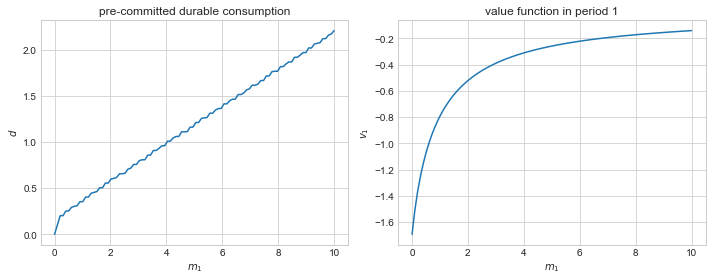

In [23]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
ax.plot(m1_vec,d_ast_vec)
ax.set_xlabel('$m_1$')
ax.set_ylabel('$d$')
ax.set_title('pre-committed durable consumption')

ax = fig.add_subplot(1,2,2)
ax.plot(m1_vec,v1_vec)
ax.set_xlabel('$m_1$')
ax.set_ylabel('$v_1$')
ax.set_title('value function in period 1')
fig.tight_layout()

## Question 3

In [24]:
Lambda = 0.2
m0_vec = np.linspace(1e-8,6,100)
d0_vec = np.linspace(1e-8,3,100)

In [25]:
v1_interp = interpolate.RegularGridInterpolator([m1_vec], v1_vec,
                                                bounds_error=False,fill_value=None)   

In [26]:
z = np.empty((m0_vec.size,d_vec.size))
for i,m0 in enumerate(m0_vec):
    for j,d0 in enumerate(d0_vec):
        
        # a. no adjustment
        v_keep = w(m0,d0,r,Delta,v2_interp)
        
        # b. adjustment
        v_adj = v1_interp([m0+(1-Lambda)*d0])[0]
        
        # c. best
        z[i,j] = 0 if v_keep > v_adj else 1

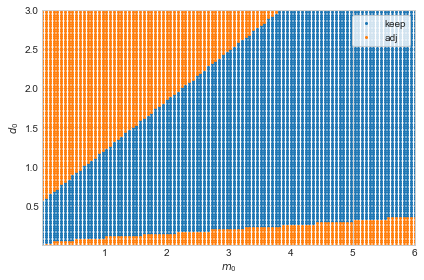

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

m0g,d0g = np.meshgrid(m0_vec,d0_vec,indexing='ij')
ax.scatter(m0g[z == 0],d0g[z == 0],s=4,label='keep')
ax.scatter(m0g[z == 1],d0g[z == 1],s=4,label='adj')

ax.set_xlim([m0_vec[0],m0_vec[-1]])
ax.set_ylim([d0_vec[0],d0_vec[-1]])
ax.set_xlabel('$m_0$')
ax.set_ylabel('$d_0$')
ax.legend(frameon=True)
fig.tight_layout()

# Gradient descent

## Question 1

In [28]:
def gradient_descent(f,x0,epsilon=1e-6,Theta=0.1,Delta=1e-8,max_iter=10_000):
    """ minimize function with gradient descent algorithm
        
    Args:

        f (callable): function
        x0 (np.ndarray): initial guess
        eps (float,optional): tolerance
        Theta (float,optional): initial step-size
        Delta (float,optional): step-size in numerical derivatives
        max_iter (int,optional): maximum number of iterations        
        
    Returns:
    
        x (ndarray): minimum
        it (int): number of iterations used
        
    """
    
    # a. initialize
    x = x0
    fx = f(x0)
    
    # b. iterate
    it = 0
    while it < max_iter:
        
        # i. jacobian
        fp = np.empty(x0.size)
        for i in range(x0.size):
            x_ = x.copy()
            x_[i] = x[i] + Delta                  
            fp[i] = (f(x_)-fx)/Delta
        
        # ii. check convergence
        if np.max(np.abs(fp)) < epsilon: break
        
        # ii. line search
        theta = Theta
        while it < max_iter:
            
            # o. x value
            x_theta = x - theta*fp

            # oo. new function value
            fx_theta = f(x_theta)
            it += 1

            # ooo. break or continue line search
            if fx_theta < fx:
                fx = fx_theta
                x = x_theta
                break
            else:
                theta /= 2
            
    return x,it

In [29]:
def rosen(x):
    return (1.0-x[0])**2+2*(x[1]-x[0]**2)**2

x0 = np.array([1.1,1.1])
try:
    x,it = gradient_descent(rosen,x0)
    print(f'minimum found at ({x[0]:.4f},{x[1]:.4f}) after {it} iterations')
    assert np.allclose(x,[1,1])
except:
    print('not implemented yet')

minimum found at (1.0000,1.0000) after 331 iterations
